<a href="https://colab.research.google.com/github/Okra77/Iris_LearningFromData/blob/main/Iris_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#將數據集分為特徵矩陣跟目標向量
X = df.iloc[:, :4]
y = df.iloc[:, 4]

In [ ]:
#將字符串目標向量轉化為數字
y, _ = pd.factorize(y)

In [ ]:
#將目標向量轉成one-hot encoding
y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#建立模型
model = tf.keras.Sequential()
#添加隱藏層
model.add(tf.keras.layers.Dense(units=10, activation='relu', input_dim=4))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
#添加輸出層
model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [ ]:
#編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#訓練模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
4/4 [==============================] - 0s 116ms/step - loss: 0.1005 - accuracy: 0.9714 - val_loss: 0.0713 - val_accuracy: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0979 - accuracy: 0.9810 - val_loss: 0.0649 - val_accuracy: 1.0000
Epoch 3/50
4/4 [==============================] - 0s 30ms/step - loss: 0.0967 - accuracy: 0.9810 - val_loss: 0.0616 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 0.0997 - accuracy: 0.9714 - val_loss: 0.0608 - val_accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 54ms/step - loss: 0.0991 - accuracy: 0.9714 - val_loss: 0.0624 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 61ms/step - loss: 0.0973 - accuracy: 0.9714 - val_loss: 0.0644 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 37ms/step - loss: 0.0966 - accuracy: 0.9810 - val_loss: 0.0656 - val_accuracy: 1.0000
Epoch 8/50
4/4 [==========

In [ ]:
#在測試集上評估模型
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: {}, Test accuracy: {}".format(loss, acc))

2/2 [==============================] - 0s 6ms/step - loss: 0.3504 - accuracy: 1.0000
Test loss: 0.35035091638565063, Test accuracy: 1.0


In [ ]:
import numpy as np

#創建一個樣本，其中包含四個特徵（花瓣長度、寬度、萼片長度和寬度）
sample = np.array([[5.1, 3.5, 1.4, 0.2]])

#將樣本轉為為二維陣列
sample = sample.reshape(1, -1)

#使用模型對樣本進行預測
predictions = model.predict(sample)

#輸出預測結果
print(predictions)
#機率最大的種類
print(np.argmax(predictions))

1/1 [==============================] - 0s 52ms/step
[[0.8955762  0.10177424 0.00264956]]
0


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


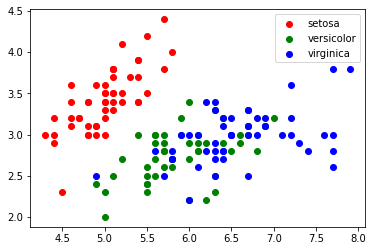

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


fig, ax = plt.subplots()


colors = ['red', 'green', 'blue']


for i in range(3):
    ax.scatter(X[y==i, 0], X[y==i, 1], color=colors[i], label=iris.target_names[i])


ax.legend()


plt.show()

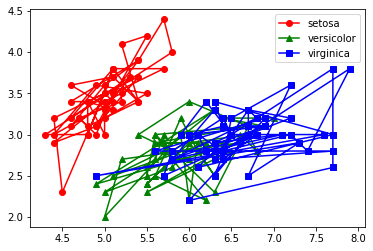

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target


fig, ax = plt.subplots()


colors = ['red', 'green', 'blue']
markers = ['o', '^', 's']


for i in range(3):
    ax.plot(X[y==i, 0], X[y==i, 1], color=colors[i], marker=markers[i], label=iris.target_names[i])


ax.legend()


plt.show()

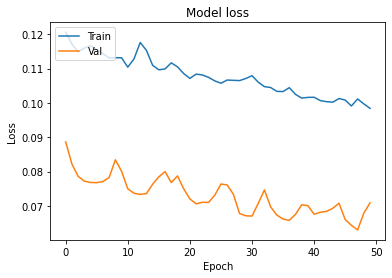

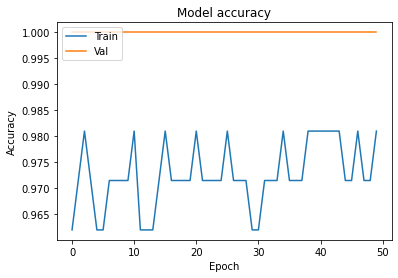

In [ ]:
#繪製損失折線圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

#繪製準確率折線圖
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()